# name: Marco Giunta
## Rlab04

In [1]:
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



# Exercise 1: newspaper inference
## Introduction
In order to apply Bayes' theorem to this problem we first need to setup a generative model for the data. Notice that each person either reads the journal or doesn't; if we suppose that for any given person the former happens with probability $p$ then this process can be modelled as a Bernoulli trial.

**a)** Due to the above if we sample a population of multiple people the process as a whole can be modelled with a *binomial* distribution - parametrized by an unknown value of $p$.   

**b)** Bayes' theorem states that:
\begin{equation}
  \text{posterior} = \frac{\text{likelihood}\times\text{prior}}{\text{evidence}}
\end{equation}
The denominator is just a constant normalization factor; if we assume a uniform prior then the prior itself equals a constant, too. This means that in our case
\begin{equation}
  \text{posterior} \propto \text{likelihood}
\end{equation}
i.e. the posterior and the likelihood are the same function up to a change of scale needed to normalize the area.       

**c)** The above points imply that the likelihood is $\text{Binom}(k = 29, n = 150; p)$ - where $n$ and $k$ are fixed by the data, whereas $p$ is the only true (continuous) variable and target of the inference. Of course $p \in [0,1]$; hence to normalize the likelihood wrt $p$ we need to integrate over $I=[0,1]$ i.e.
\begin{equation}
  \text{posterior} = \frac{\text{Binom}(k=29,n=150;p)}{\int_0^1 \text{Binom}(k=29,n=150;p)\mathrm{d}p}
\end{equation}

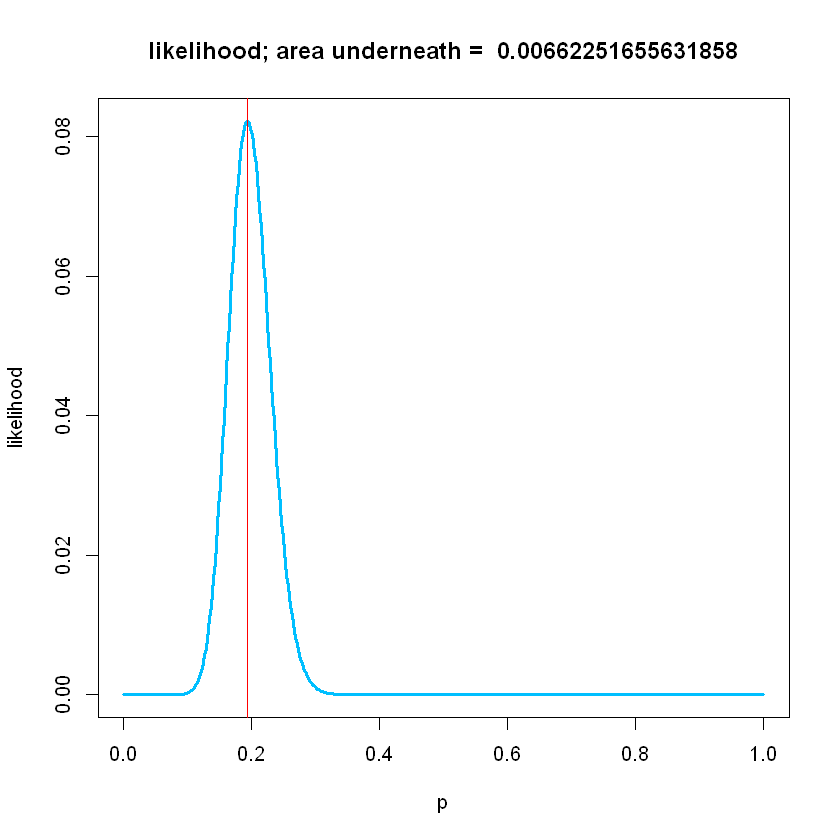

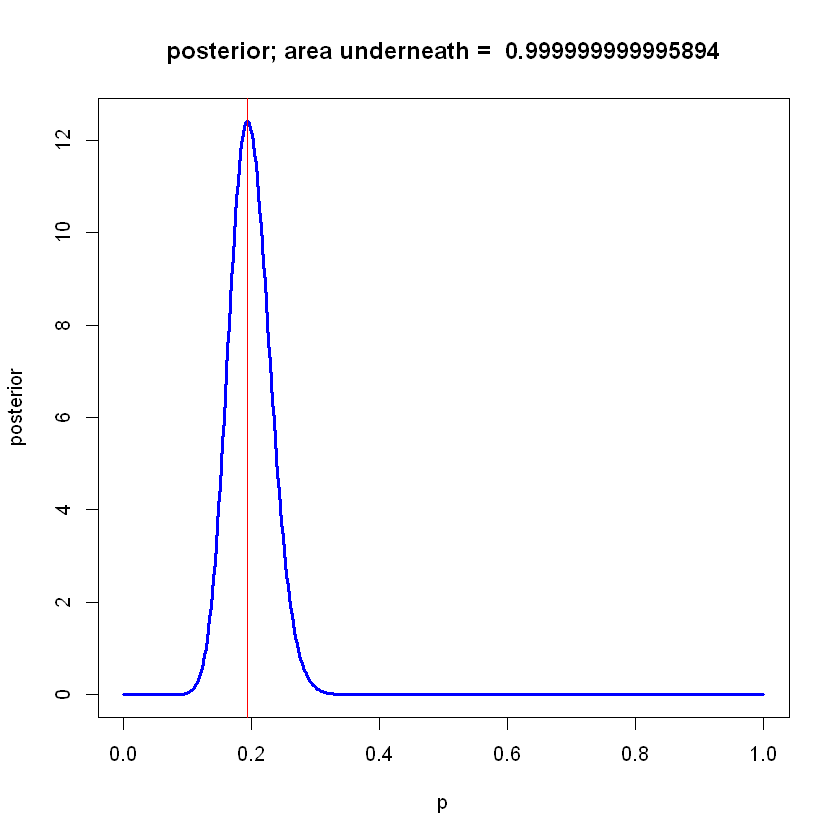

In [40]:
likelihood <- function(p) dbinom(x = 29, size = 150, prob = p) # explicit but equivalent function definition: function(p) p^29*(1-p)^(150-29) * choose(150,29)

posterior <- function(p) likelihood(p)/integrate(likelihood, lower = 0, upper = 1)$value

p.vector <- seq(0, 1, length.out = 500)

plot(p.vector, likelihood(p.vector), type = "l", lwd = 3, col = "deepskyblue", xlab = "p", ylab = "likelihood", main = paste("likelihood; area underneath = ",integrate(likelihood, 0, 1)$value))
abline(v = 29/150, col = "red")
#lines(p.vector, posterior(p.vector), lwd = 3, col = "blue")
plot(p.vector, posterior(p.vector), type = "l", lwd = 3, col = "blue", xlab = "p", ylab = "posterior", main = paste("posterior; area underneath = ", integrate(posterior, 0, 1)$value))
abline(v = 29/150, col = "red")

#df <- data.frame(p.vector, likelihood(p.vector), posterior(p.vector))
#names(df) <- c("p", "likelihood", "posterior")
#g <- ggplot(data = df) + geom_line(aes(x = p, y = likelihood)) + geom_line(aes(x = p, y = posterior))
#g

Notice that the mode is exactly at $29/150$. This makes sense: in absence of any pre-existing information (we picked a uniform prior) our best "intuitive" estimate for $p$ coming from the data should be $29/150$.

# Exercise 2: concert hall inference

# Exercise 3: coin flip inference